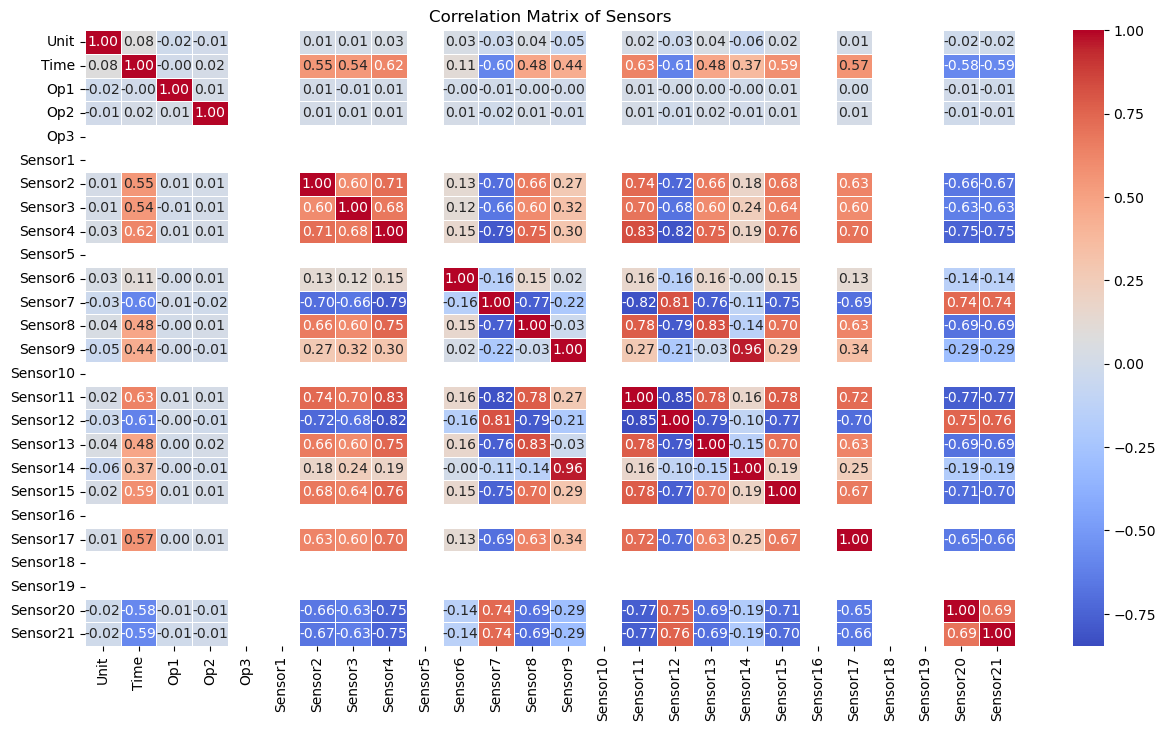

In [19]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Sensors")
plt.show()


C:\Users\siddhu\AppData\Local\Temp\ipykernel_31688\4140237721.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, header=None, delim_whitespace=True)  # Ensure correct delimiter


Column names assigned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Unit      20631 non-null  int64  
 1   Time      20631 non-null  int64  
 2   Op1       20631 non-null  float64
 3   Op2       20631 non-null  float64
 4   Op3       20631 non-null  float64
 5   Sensor1   20631 non-null  float64
 6   Sensor2   20631 non-null  float64
 7   Sensor3   20631 non-null  float64
 8   Sensor4   20631 non-null  float64
 9   Sensor5   20631 non-null  float64
 10  Sensor6   20631 non-null  float64
 11  Sensor7   20631 non-null  float64
 12  Sensor8   20631 non-null  float64
 13  Sensor9   20631 non-null  float64
 14  Sensor10  20631 non-null  float64
 15  Sensor11  20631 non-null  float64
 16  Sensor12  20631 non-null  float64
 17  Sensor13  20631 non-null  float64
 18  Sensor14  20631 non-null  float64
 19  Sensor15  20631 non-null  float

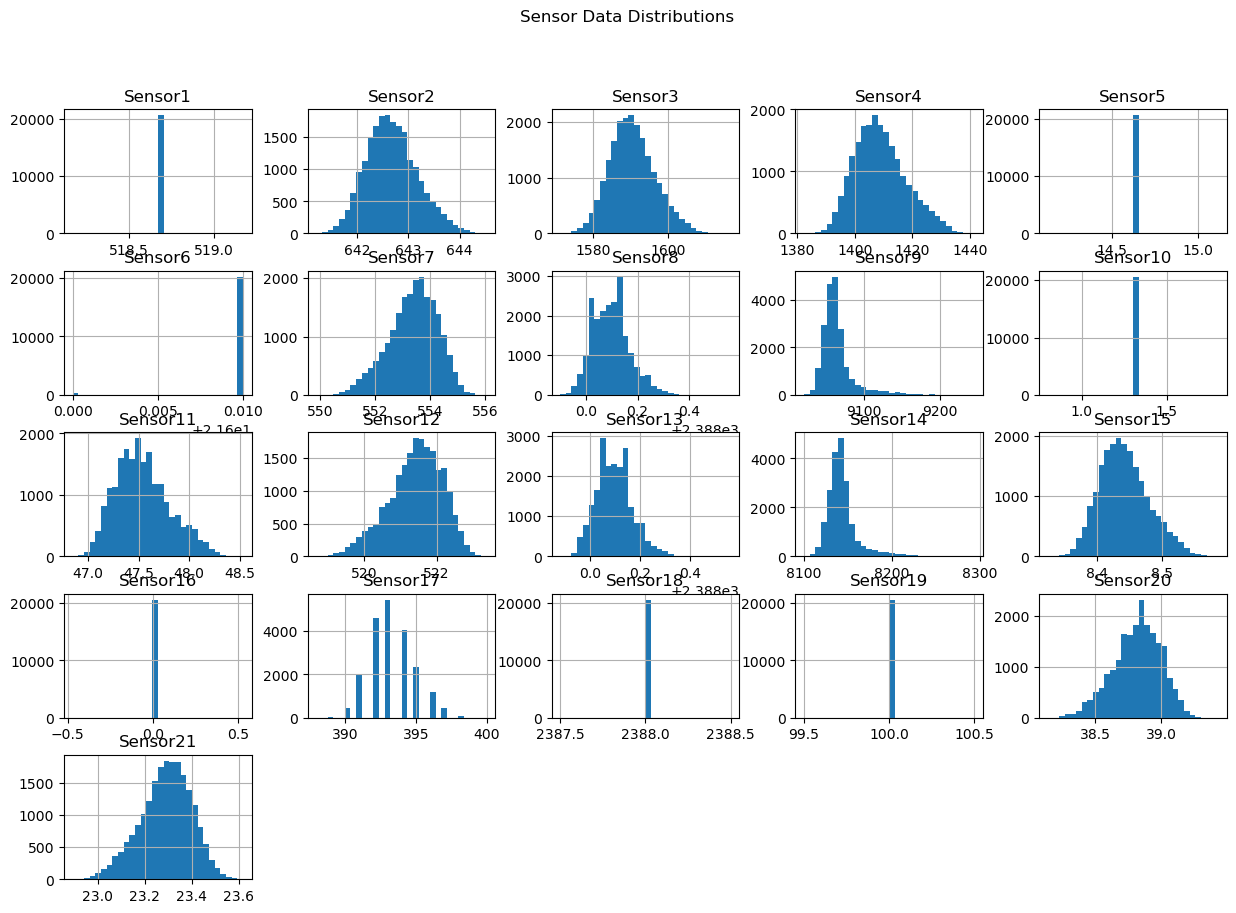

Sensor distributions plot saved as 'EDA_sensor_distributions.png'
Processed dataset saved as 'processed_train_FD001.csv'


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset with proper delimiter
file_path = "C:\\Users\\siddhu\\Downloads\\nasa\\train_FD001.csv"  # Update this path if needed
df = pd.read_csv(file_path, header=None, delim_whitespace=True)  # Ensure correct delimiter

# Assign Column Names based on standard CMAPSS dataset structure
expected_columns = ['Unit', 'Time', 'Op1', 'Op2', 'Op3'] + [f'Sensor{i}' for i in range(1, 22)]

# Ensure correct number of columns before assigning names
if df.shape[1] == len(expected_columns):
    df.columns = expected_columns
    print("Column names assigned successfully!")
else:
    print(f"⚠ Warning: Expected {len(expected_columns)} columns, but found {df.shape[1]}. Check your CSV formatting.")

# 1. Basic Info
dataset_info = df.info()

# 2. Summary Statistics
summary_stats = df.describe()
summary_stats.to_csv("EDA_summary_statistics.csv", index=True)
print("\nSummary statistics saved as 'EDA_summary_statistics.csv'")

# 3. Check for Missing Values
missing_values = df.isnull().sum()
missing_values.to_csv("EDA_missing_values.csv", index=True)
print("Missing values report saved as 'EDA_missing_values.csv'")

# 4. Sensor Data Distributions
df.iloc[:, 5:].hist(figsize=(15, 10), bins=30)
plt.suptitle("Sensor Data Distributions")
plt.savefig("EDA_sensor_distributions.png", dpi=300)
plt.show()
print("Sensor distributions plot saved as 'EDA_sensor_distributions.png'")

# 5. Save Processed Data (Optional)
df.to_csv("processed_train_FD001.csv", index=False)
print("Processed dataset saved as 'processed_train_FD001.csv'")


C:\Users\siddhu\AppData\Local\Temp\ipykernel_31688\1645482122.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, header=None, delim_whitespace=True)  # Ensure correct delimiter


Column names assigned successfully!


Enter a unit number (1-100):  6


All plots saved as Unit_6_All_Plots.png


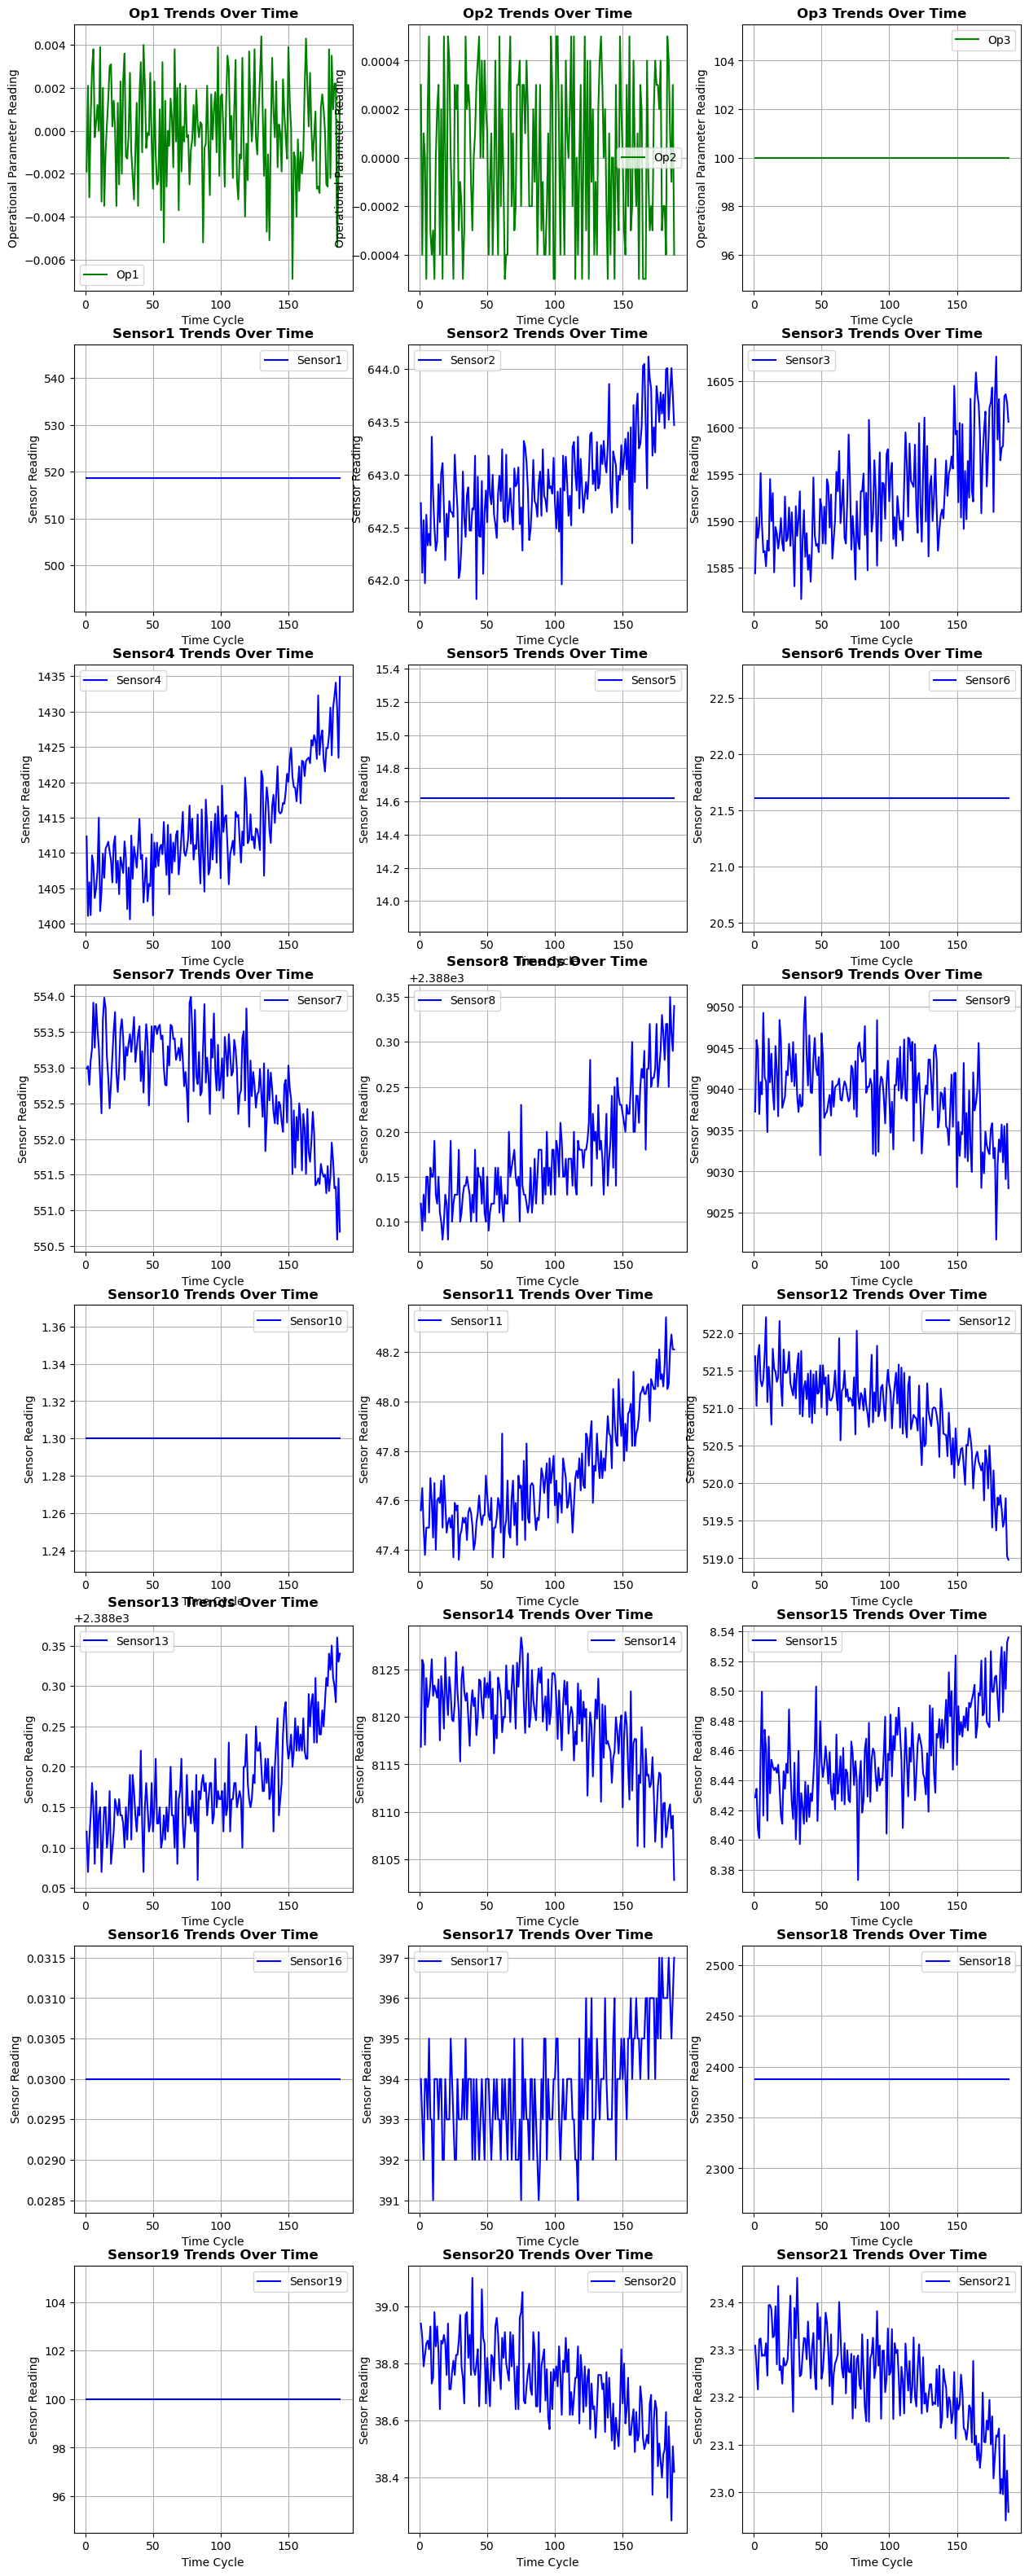

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset with proper delimiter
file_path = "C:\\Users\\siddhu\\Downloads\\nasa\\train_FD001.csv"  # Update this path if needed
df = pd.read_csv(file_path, header=None, delim_whitespace=True)  # Ensure correct delimiter

# Assign Column Names based on standard CMAPSS dataset structure
expected_columns = ['Unit', 'Time', 'Op1', 'Op2', 'Op3'] + [f'Sensor{i}' for i in range(1, 22)]

# Ensure correct number of columns before assigning names
if df.shape[1] == len(expected_columns):
    df.columns = expected_columns
    print("Column names assigned successfully!")
else:
    print(f"⚠ Warning: Expected {len(expected_columns)} columns, but found {df.shape[1]}. Check your CSV formatting.")

# User Input for Unit Number
while True:
    try:
        unit_number = int(input("Enter a unit number (1-100): "))
        if 1 <= unit_number <= 100:
            break
        else:
            print("Please enter a valid unit number between 1 and 100.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 100.")

# Filter data for the selected unit
unit_data = df[df['Unit'] == unit_number]

# 1. Individual Sensor and Operational Parameter Trends Over Time (for user-selected unit)
operational_columns = ['Op1', 'Op2', 'Op3']  # Operational parameters
sensor_columns = unit_data.columns[5:]  # Sensor columns

# Determine the number of rows and columns for the subplot grid
num_plots = len(operational_columns) + len(sensor_columns)
num_columns = 3  # You can adjust this number
num_rows = (num_plots + num_columns - 1) // num_columns  # Calculate required rows

# Create a figure with multiple subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot trends for operational parameters (Op1, Op2, Op3)
for i, param in enumerate(operational_columns):
    axes[i].plot(unit_data['Time'], unit_data[param], label=param, color='g', linewidth=1.5)
    axes[i].set_xlabel("Time Cycle")
    axes[i].set_ylabel("Operational Parameter Reading")
    axes[i].set_title(f"{param} Trends Over Time", fontsize=12, fontweight="bold")
    axes[i].legend()
    axes[i].grid(True)

# Plot trends for sensor data
for i, sensor in enumerate(sensor_columns, len(operational_columns)):
    axes[i].plot(unit_data['Time'], unit_data[sensor], label=sensor, color='b', linewidth=1.5)
    axes[i].set_xlabel("Time Cycle")
    axes[i].set_ylabel("Sensor Reading")
    axes[i].set_title(f"{sensor} Trends Over Time", fontsize=12, fontweight="bold")
    axes[i].legend()
    axes[i].grid(True)

# Save the entire figure (all subplots)
plot_filename = f"Unit_{unit_number}_All_Plots.png"
fig.savefig(plot_filename, bbox_inches="tight")
print(f"All plots saved as {plot_filename}")

plt.show()  # Display all subplots


C:\Users\siddhu\AppData\Local\Temp\ipykernel_31688\2644160094.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, header=None, delim_whitespace=True)  # Ensure correct delimiter


Column names assigned successfully!


Enter a unit number (1-100):  5


Correlation heatmap saved as Unit_5_Correlation_Heatmap.png


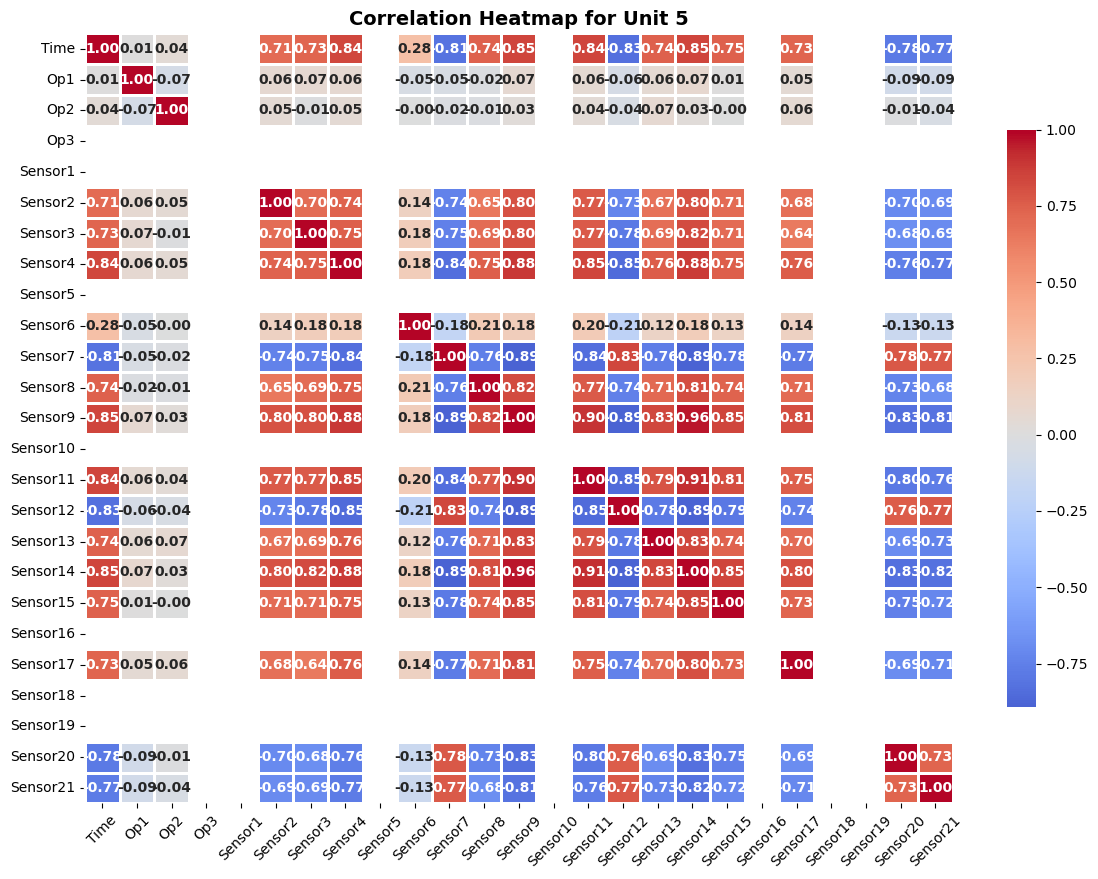

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset with proper delimiter
file_path = "C:\\Users\\siddhu\\Downloads\\nasa\\train_FD001.csv"  # Update this path if needed
df = pd.read_csv(file_path, header=None, delim_whitespace=True)  # Ensure correct delimiter

# Assign Column Names based on standard CMAPSS dataset structure
expected_columns = ['Unit', 'Time', 'Op1', 'Op2', 'Op3'] + [f'Sensor{i}' for i in range(1, 22)]

# Ensure correct number of columns before assigning names
if df.shape[1] == len(expected_columns):
    df.columns = expected_columns
    print("Column names assigned successfully!")
else:
    print(f"⚠ Warning: Expected {len(expected_columns)} columns, but found {df.shape[1]}. Check your CSV formatting.")

# User Input for Unit Number
while True:
    try:
        unit_number = int(input("Enter a unit number (1-100): "))
        if 1 <= unit_number <= 100:
            break
        else:
            print("Please enter a valid unit number between 1 and 100.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 100.")

# Filter data for the selected unit
unit_data = df[df['Unit'] == unit_number]

# 2. Correlation Matrix including Operational Parameters
# Combine operational parameters and sensor data for correlation matrix
correlation_data = unit_data.drop(columns=['Unit'])

# Create the heatmap for the correlation matrix
plt.figure(figsize=(14, 10))  # Larger figure for clarity
correlation_matrix = correlation_data.corr()  # Calculate correlation matrix

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=1,
            cbar_kws={'shrink': 0.75}, annot_kws={"size": 10, "weight": "bold"})  # Heatmap plot

plt.title(f"Correlation Heatmap for Unit {unit_number}", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Save the heatmap as an image file
heatmap_filename = f"Unit_{unit_number}_Correlation_Heatmap.png"
plt.savefig(heatmap_filename)
print(f"Correlation heatmap saved as {heatmap_filename}")

plt.show()  # Display the correlation matrix on screen
